In [1]:
from pyiron_base import TemplateJob, ImportAlarm, Project
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from paradisjob import ParaDis   

### Create a project

In [2]:
pr = Project("frank_read_src_job")
pr.remove_jobs(recursive=True, silently=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
job = pr.create_job(ParaDis, "test1")

### Input parameters

In [4]:
job._ctrlfilename = "frank_read_src.ctrl"
job._datafilename = "frank_read_src.data"

job._write_default_datafile = 0

ctrl_dict = {
                #domain geometry
                "numdomains" : [1, 1, 1],
    
                #cell geometry
                "numcells" : [4, 4, 4],
    
                # output directory
                "dirname" : "results",
    
                #fast multipole parameters
                "fmEnabled" : 1,
                "fmMPOrder" : 2,
                "fmTaylorOrder" : 5,
                "fmCorrectionTbl" : "../../../../ParaDiS/inputs/fm-ctab.Ta.600K.0GPa.m2.t5.dat",
    
                # Discretization and topological parameters
                "maxstep" : 5000,
                "remeshRule" : 2,
                "minSeg" : 140,
                "maxSeg" : 300,
                "rTol" : 1.0,
                "timestepIntegrator" : "trapezoid", 

                #Materials parameters
                "rc" : 5.0,
                "MobScrew" : 10.0,
                "MobEdge" : 10.0,
                "MobClimb" : 1.0e-10,
                "mobilityLaw" : "BCC_0",

                #Loading conditions
                "loadType" : 0,
                "edotdir" : [0, 0, 1],
                "appliedStress" : [0.0, 0.0, 5.0e+08, 0.0, 0.0, 0.0],

                #I/O parameters
                "savecn" : 1,
                "savecnfreq" : 100,
                "savecncounter" : 0,
                "saveprop" : 1,
                "savepropfreq" : 1,
                "gnuplot" : 1,
                "gnuplotfreq" : 100,
                "gnuplotcounter" : 0,
                "povray" : 1,
                "povrayfreq" : 100,
                "povraycounter" : 0
            }
job._ctrlparams = ctrl_dict

data_dict = {
                "cubel" : 8000,
                "type" : "frank-read-src",
                "maxseglen" : 200.0,
                "nfrsrcs" : 1,
                "frlen" : [400.0, 500.0],
                "npf" : 3
            }

job._dataparams = data_dict

### Run the serial job

In [5]:
job.run()

The job test1 was saved and received the ID: 25


### Postprocessing


##### properties : 
             "density"     : strain vs dislocation density
             "epsdot"      : strain rate vs time
             "time_pl_str" : plastic strain vs time

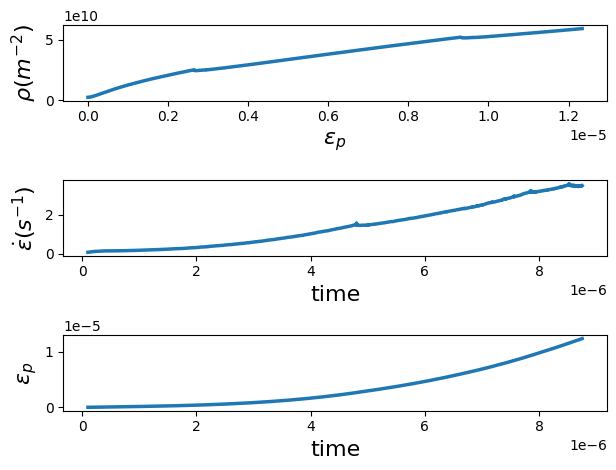

In [6]:
properties = ["density","epsdot","time_pl_str"]
job.plot_results(properties)